In [60]:
import pandas as pd
import numpy as np
import scipy.io
import math
from collections import Counter
import copy
import warnings
import tensorflow 
from tensorflow.keras.layers import Dense, Input,Conv1D, Flatten
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
warnings.filterwarnings("ignore")
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]
def rms(arr):
    n = len(arr)
    squared = np.array(arr) * np.array(arr)
    sum = np.sum(squared)
    mean = (sum / (float)(n))
    root = math.sqrt(mean)
    return root
def mav(arr):
    n = len(arr)
    mav = sum((abs(np.array(arr))))/(float)(n)
    return mav
def var(arr):
    n = len(arr)
    squared = np.array(arr) * np.array(arr)
    sum = np.sum(squared)
    result = (sum / (float)(n))
    return result
def wl(arr):
    n = len(arr)
    sum = 0
    for i in range(1, n):
        sum += abs(arr[i] - arr[i - 1])
    return sum
def iav(arr):
    return sum(abs(np.array(arr)))
def mean(arr):
    return np.sum(arr)/len(arr)
def pretty(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):

            pretty(value, indent + 2)
            print('-----------------------')
        else:
            print('\t' * (indent + 2) + str(value))
            print(" ")
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0] + 1)
def extractSubject(name):
    ex1Path = 'DB1/' + name + '/' + name + '_A1_E1.mat'
    print(ex1Path)
    ex1 = scipy.io.loadmat(ex1Path)
    emg = ex1['emg']
    EMGdf = pd.DataFrame.from_dict(emg)
    stimulus = ex1['restimulus']

    ex2Path = 'DB1/' + name + '/' + name + '_A1_E2.mat'
    ex2 = scipy.io.loadmat(ex2Path)
    emg2 = ex2['emg']
    EMGdf2 = pd.DataFrame.from_dict(emg2)
    stimulus2 = ex2['restimulus']

    ex3Path = 'DB1/' + name + '/' + name + '_A1_E3.mat'
    ex3 = scipy.io.loadmat(ex3Path)
    emg3 = ex3['emg']
    EMGdf3 = pd.DataFrame.from_dict(emg3)
    stimulus3 = ex3['restimulus']

    Movements = {}
    for m in range(1, 51):
        if (m < 11):
            movementIndices = np.where(stimulus == m)[0]
            repetitions = consecutive(movementIndices)
            EMG = EMGdf
        elif (m < 28):
            movementIndices = np.where(stimulus2 == (m - 10))[0]
            repetitions = consecutive(movementIndices)
            EMG = EMGdf2
        else:
            movementIndices = np.where(stimulus3 == (m - 27))[0]
            repetitions = consecutive(movementIndices)
            EMG = EMGdf3

        Electrodes = {}
        for e in range(1, 11):
            temp = {}
            for r in range(1, 7):
                startIndex = repetitions[r - 1][0]
                LastIndex = repetitions[r - 1][len(repetitions[r - 1]) - 1]
                df = EMG.iloc[startIndex:LastIndex, e - 1]
                df.reset_index(drop=True, inplace=True)
                narray = df.to_numpy(dtype=None, copy=False)
                temp["R{0}".format(r)] = narray
            Electrodes["Electrode{0}".format(e)] = temp
        Movements["Movement{0}".format(m)] = Electrodes
    return Movements
def extractSubjectAngles(name):
    ex1Path = 'Kinematics/' + name + '/' + name + '_E1_A1.mat'
    print(ex1Path)
    ex1 = scipy.io.loadmat(ex1Path)
    angles1 = ex1['angles']
    anglesDF1 = pd.DataFrame.from_dict(angles1)
    stimulus = ex1['restimulus']

    ex2Path = 'Kinematics/' + name + '/' + name + '_E2_A1.mat'
    ex2 = scipy.io.loadmat(ex2Path)
    angles2 = ex2['angles']
    anglesDF2 = pd.DataFrame.from_dict(angles2)
    stimulus2 = ex2['restimulus']

    ex3Path = 'Kinematics/' + name + '/' + name + '_E3_A1.mat'
    ex3 = scipy.io.loadmat(ex3Path)
    angles3 = ex3['angles']
    anglesDF3 = pd.DataFrame.from_dict(angles3)
    stimulus3 = ex3['restimulus']

    Movements = {}
    for m in range(1, 51):
        if (m < 11):
            movementIndices = np.where(stimulus == m)[0]
            repetitions = consecutive(movementIndices)
            angle = anglesDF1
        elif (m < 28):
            movementIndices = np.where(stimulus2 == (m - 10))[0]
            repetitions = consecutive(movementIndices)
            angle = anglesDF2
        else:
            movementIndices = np.where(stimulus3 == (m - 27))[0]
            repetitions = consecutive(movementIndices)
            angle = anglesDF3

        Angles = {}
        for a in range(1,23):
            if a == 6:
               Angles["Angle6"] = ""
               continue

            temp={}
            for r in range(1, 7):
                startIndex = repetitions[r - 1][0]
                LastIndex = repetitions[r - 1][len(repetitions[r - 1]) - 1]
                df = angle.iloc[startIndex:LastIndex, a-1]
                df.reset_index(drop=True, inplace=True)
                narray = df.to_numpy(dtype=None, copy=False)
                temp["R{0}".format(r)] = narray
            Angles["Angle{0}".format(a)] = temp
        Movements["Movement{0}".format(m)] = Angles

    return Movements


In [5]:
final_df = pd.DataFrame(columns={'RMS1', 'MAV1', 'VAR1', 'WL1', 'IAV1',
                                 'RMS2', 'MAV2', 'VAR2', 'WL2', 'IAV2',
                                 'RMS3', 'MAV3', 'VAR3', 'WL3', 'IAV3',
                                 'RMS4', 'MAV4', 'VAR4', 'WL4', 'IAV4',
                                 'RMS5', 'MAV5', 'VAR5', 'WL5', 'IAV5',
                                 'RMS6', 'MAV6', 'VAR6', 'WL6', 'IAV6',
                                 'RMS7', 'MAV7', 'VAR7', 'WL7', 'IAV7',
                                 'RMS8', 'MAV8', 'VAR8', 'WL8', 'IAV8',
                                 'RMS9', 'MAV9', 'VAR9', 'WL9', 'IAV9',
                                 'RMS10', 'MAV10', 'VAR10', 'WL10', 'IAV10',
                                 'Train'})
final_df_angle = pd.DataFrame(columns={})
df_angle = pd.DataFrame(columns={})
i=0
for s in range(1,8):
    subject = 'S' + str(s)
    df_angles = pd.DataFrame.from_dict(extractSubjectAngles(subject))
    for m in range(1,11):
        M = df_angles['Movement'+str(m)]
        start = copy.deepcopy(i)
        for a in range (1,23):
            if a==6:
                continue

            Angles = M['Angle' +str(a)]
            for r in range(1,7):
                rep = "R" + str(r)
                for x in range(0, len(Angles[rep]), 48):
                    df_angle.at[i, a-1] = mean(Angles[rep][x:x + 50])
                    i += 1
            if a != 22:
                i = copy.deepcopy(start)
    final_df_angle = final_df_angle.append(df_angle, ignore_index=True)            

Kinematics/S1/S1_E1_A1.mat
Kinematics/S2/S2_E1_A1.mat
Kinematics/S3/S3_E1_A1.mat
Kinematics/S4/S4_E1_A1.mat
Kinematics/S5/S5_E1_A1.mat
Kinematics/S6/S6_E1_A1.mat
Kinematics/S7/S7_E1_A1.mat


In [6]:
for s in range(1,8):
    subject = 'S' + str(s)
    dff = pd.DataFrame.from_dict(extractSubject(subject))
    df = pd.DataFrame(columns={'RMS1', 'MAV1', 'VAR1', 'WL1', 'IAV1',
                           'RMS2', 'MAV2', 'VAR2', 'WL2', 'IAV2',
                           'RMS3', 'MAV3', 'VAR3', 'WL3', 'IAV3',
                           'RMS4', 'MAV4', 'VAR4', 'WL4', 'IAV4',
                           'RMS5', 'MAV5', 'VAR5', 'WL5', 'IAV5',
                           'RMS6', 'MAV6', 'VAR6', 'WL6', 'IAV6',
                           'RMS7', 'MAV7', 'VAR7', 'WL7', 'IAV7',
                           'RMS8', 'MAV8', 'VAR8', 'WL8', 'IAV8',
                           'RMS9', 'MAV9', 'VAR9', 'WL9', 'IAV9',
                           'RMS10', 'MAV10', 'VAR10', 'WL10', 'IAV10',
                           'Train'})
    for e in range(1, 11):
        electrode = 'Electrode' + str(e)
        i=0
        for m in range(1,11):
            M = dff['Movement'+str(m)][electrode]
            for r in range(1, 7):
                rep = "R" + str(r)
                if (r in [1, 3, 4, 6]):
                    train = 1
                else:
                    train = 0
                for x in range(0, len(M[rep]), 48):
                    df.at[i, 'RMS' + str(e)] = rms(M[rep][x:x + 50])
                    df.at[i, 'MAV' + str(e)] = mav(M[rep][x:x + 50])
                    df.at[i, 'VAR' + str(e)] = var(M[rep][x:x + 50])
                    df.at[i, 'WL' + str(e)] = wl(M[rep][x:x + 50])
                    df.at[i, 'IAV' + str(e)] = iav(M[rep][x:x + 50])
                    df.at[i, 'Train'] = train
                    i += 1
    final_df = final_df.append(df, ignore_index=True)

DB1/S1/S1_A1_E1.mat
DB1/S2/S2_A1_E1.mat
DB1/S3/S3_A1_E1.mat
DB1/S4/S4_A1_E1.mat
DB1/S5/S5_A1_E1.mat
DB1/S6/S6_A1_E1.mat
DB1/S7/S7_A1_E1.mat


In [67]:
final_df['CMC1_f'] = df_angle[0]
final_df['CMC1_a'] =  df_angle[1]
final_df['MCP1'] =  df_angle[2]
final_df['IP1'] =  df_angle[3]
final_df['MCP2_f'] =  df_angle[4]
final_df['PIP2'] =  df_angle[6]
final_df['MCP3_f'] =  df_angle[7]
final_df['PIP3'] =  df_angle[8]
final_df['MCP4_f'] =  df_angle[9]
final_df['MCP4_a'] =  df_angle[10]
final_df['PIP4'] =  df_angle[11]
final_df['CMC5'] =  df_angle[12]
# final_df['MCP5_f'] =  df_angle[13]
final_df['MCP5_a'] =  df_angle[14]
final_df['PIP5'] =  df_angle[15]
final_df['DIP2'] =  df_angle[16]
final_df['DIP3'] =  df_angle[17]
final_df['DIP4'] =  df_angle[18]
final_df['DIP5'] =  df_angle[19]
# final_df['WRIST_F'] =  df_angle[20]
# final_df['WRIST_A'] =  df_angle[21]

features = {
            'RMS1', 'MAV1', 'VAR1', 'WL1', 'IAV1',
            'RMS2', 'MAV2', 'VAR2', 'WL2', 'IAV2',
            'RMS3', 'MAV3', 'VAR3', 'WL3', 'IAV3',
            'RMS4', 'MAV4', 'VAR4', 'WL4', 'IAV4',
            'RMS5', 'MAV5', 'VAR5', 'WL5', 'IAV5',
            'RMS6', 'MAV6', 'VAR6', 'WL6', 'IAV6',
            'RMS7', 'MAV7', 'VAR7', 'WL7', 'IAV7',
            'RMS8', 'MAV8', 'VAR8', 'WL8', 'IAV8',
            'RMS9', 'MAV9', 'VAR9', 'WL9', 'IAV9',
            'RMS10', 'MAV10', 'VAR10', 'WL10', 'IAV10' }

angles = {'CMC1_f','CMC1_a','MCP1','IP1','MCP2_f',
        'PIP2','MCP3_f','MCP4_f','MCP4_a',
        'PIP4','CMC5','MCP5_a','PIP5',
        'DIP2','DIP4','DIP5', 'DIP3', 'PIP3'
        }

print(final_df)

         WL2      VAR2     WL1      RMS5      VAR7    WL10      RMS4  \
0      0.696  0.006193  0.2393  0.002475  0.013052  0.0712  0.002475   
1     0.4956  0.008398  0.2317  0.006211  0.097035  0.0807  0.027218   
2     0.0707  0.000206  0.1807  0.003699  0.072732  0.0785   0.01148   
3        0.0  0.000006  0.1883  0.002618  0.000487  0.0296    0.0024   
4        0.0  0.000006  0.2173  0.002475  0.002658  0.0715  0.002475   
...      ...       ...     ...       ...       ...     ...       ...   
3463  0.1539  0.000735    0.01  0.002618  0.034859  0.1271  0.002475   
3464     0.0  0.000006   0.005  0.002754  0.020882   0.134    0.0024   
3465   0.005  0.000006    0.01  0.002687  0.021727  0.1248    0.0024   
3466     0.0  0.000006   0.005  0.002475  0.018225  0.1388    0.0024   
3467     0.0  0.000006  0.0098  0.002554  0.016256  0.1047  0.002478   

          MAV7      VAR9      MAV3  ...     MCP4_f    MCP4_a       PIP4  \
0     0.109174  0.003617  0.021462  ...  10.081088  0.517882

In [68]:
X_train = final_df[final_df['Train'] == 1].loc[:, features]
scalar =  StandardScaler()
scalar = scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = final_df[final_df['Train'] == 0].loc[:, features]
X_test = scalar.transform(X_test)

y_train = final_df[final_df['Train'] == 1].loc[:, angles]
y_test = final_df[final_df['Train'] == 0].loc[:, angles]
y_test.to_csv('angles_y_test.csv')



In [70]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)
print("X Train shape: ", X_train.shape)
print("X Test shape: ", X_test.shape)
input = Input(shape =(50,1))
x = Conv1D(32,31, activation='relu', padding='same', input_shape = (X_train.shape[1],1))(input)
print(x)
x = Conv1D(64,31, activation='relu' ,padding='same' )(x)
x = Conv1D(64,31, activation='relu', padding='same')(x)
x = Conv1D(32,31, activation='relu', padding='same')(x)
x = Conv1D(10,31, activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(256, activation='sigmoid')(x)
x = Dense(10,activation='sigmoid')(x)
ouput = Dense(18, activation='linear')(x)
model = Model(input, ouput)
model.compile(optimizer=Adam(learning_rate=0.002), loss="mean_squared_error", metrics=['mse'])
model.fit(X_train, y_train, epochs=1000)
print(model.evaluate(X_test, y_test))





X Train shape:  (2289, 50, 1)
X Test shape:  (1179, 50, 1)
KerasTensor(type_spec=TensorSpec(shape=(None, 50, 32), dtype=tf.float32, name=None), name='conv1d_58/Relu:0', description="created by layer 'conv1d_58'")
Epoch 1/1000
72/72 [==============================] - 2s 26ms/step - loss: 669.3773 - mse: 669.3773
Epoch 2/1000
72/72 [==============================] - 1s 20ms/step - loss: 654.0657 - mse: 654.0657
Epoch 3/1000
72/72 [==============================] - 2s 24ms/step - loss: 633.2634 - mse: 633.2634
Epoch 4/1000
72/72 [==============================] - 1s 20ms/step - loss: 613.8871 - mse: 613.8871
Epoch 5/1000
72/72 [==============================] - 1s 20ms/step - loss: 598.4658 - mse: 598.4658
Epoch 6/1000
72/72 [==============================] - 1s 20ms/step - loss: 585.3043 - mse: 585.3043
Epoch 7/1000
72/72 [==============================] - 2s 22ms/step - loss: 573.8344 - mse: 573.8344
Epoch 8/1000
72/72 [==============================] - 1s 20ms/step - loss: 563.7311 - m

KeyboardInterrupt: 

In [39]:

predicted = model.predict(X_test)
print(predicted[0])
cc = np.corrcoef(y_test, predicted[0])
print(cc)
print(y_test.corr(predicted , method='pearson'))
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
# for i in [0,1,2]:
#     ax[i].scatter(x[0,],x[1+i,])
#     ax[i].title.set_text('Correlation = ' + "{:.2f}".format(cc[0,i+1]))
#     ax[i].set(xlabel='x',ylabel='y')
# fig.subplots_adjust(wspace=.4)    
# plt.show()
# y_test.reset_index(drop=True, inplace=True)
# columns = ['DIP5','DIP2','MCP1','PIP3','DIP4','CMC1_a','CMC1_f','PIP4','MCP4_f','PIP2','DIP3','CMC5','PIP5','IP1','MCP3_f','MCP2_f','MCP4_a','MCP5_a']
# Error = pd.DataFrame(columns=columns)
# length = y_test.shape[0]
# for i in range (0,length):
#     print(abs(predicted[i]))
#     Error.at[i,:] = abs(abs(predicted[i])-abs(y_test.iloc[i,:]))



[ 12.829742    17.39249     12.286711     7.0016785  -23.677605
  35.86866    -25.545094    -4.2817245  -15.835609    11.839062
  -7.321875     2.9818316   12.887023    -7.86882      0.90400505
   8.495595     8.312137    47.483063  ]
[[1.         0.9926965  0.99234191 ... 0.54262641 0.54278177 0.64735627]
 [0.9926965  1.         0.9998006  ... 0.53317202 0.53333053 0.58370393]
 [0.99234191 0.9998006  1.         ... 0.5255387  0.52568916 0.57625761]
 ...
 [0.54262641 0.53317202 0.5255387  ... 1.         0.9999972  0.6687089 ]
 [0.54278177 0.53333053 0.52568916 ... 0.9999972  1.         0.66907727]
 [0.64735627 0.58370393 0.57625761 ... 0.6687089  0.66907727 1.        ]]


TypeError: corr() got multiple values for argument 'method'

DIP5      10.226774
DIP2      12.753833
MCP1       5.621243
PIP3       8.787537
DIP4      23.486044
CMC1_a     4.426753
CMC1_f     9.189486
PIP4      15.800375
MCP4_f     8.269917
PIP2      17.527614
DIP3      14.123447
CMC5       1.702150
PIP5      11.875765
IP1       13.869480
MCP3_f    16.453266
MCP2_f    11.439726
MCP4_a     6.046123
MCP5_a    12.918933
dtype: float64


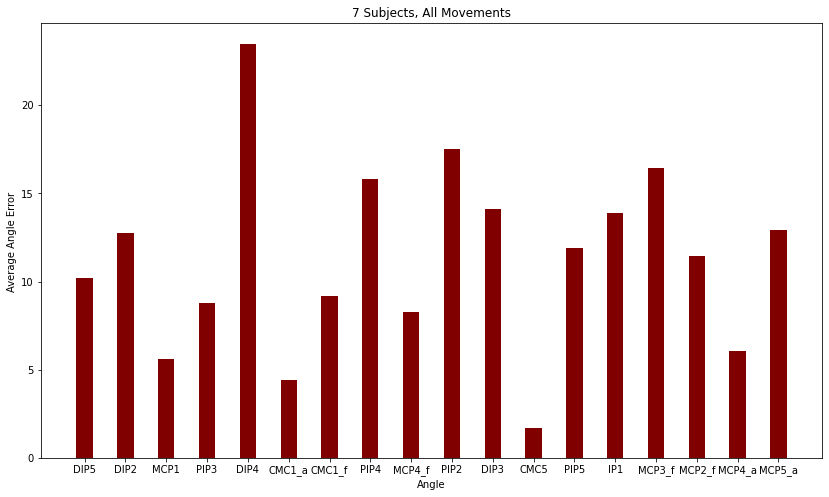

In [139]:
Error.to_csv('error_test1.csv')   

print(Error.mean())
fig = plt.figure(figsize=(14, 8))
 
# creating the bar plot
plt.bar(columns, Error.mean(), color ='maroon',
        width = 0.4)
 
plt.xlabel("Angle")
plt.ylabel("Average Angle Error ")
plt.title("7 Subjects, All Movements")
plt.show()
